<a href="https://colab.research.google.com/github/HoHoangHuyQuang/Fcc_DogvsCat_recognition/blob/main/ML_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Get dataset

In [ ]:
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

--2021-05-04 13:11:44--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>]  67.43M  19.4MB/s    in 4.4s    

2021-05-04 13:11:49 (15.4 MB/s) - ‘cats_and_dogs.zip’ saved [70702765/70702765]



In [ ]:
!unzip cats_and_dogs.zip

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [ ]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [ ]:
BATCH_SIZE = 64
EPOCHS = 40
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# rescaling
train_image_generator = ImageDataGenerator(rescale=1.0/255)
validation_image_generator = ImageDataGenerator(rescale=1.0/255)
test_image_generator = ImageDataGenerator(rescale=1.0/255)


train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size = (IMG_HEIGHT,IMG_WIDTH),
    class_mode = 'binary',
    batch_size = BATCH_SIZE)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size = (IMG_HEIGHT,IMG_WIDTH),
    class_mode = 'binary',
    batch_size = BATCH_SIZE)

test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size = (IMG_HEIGHT,IMG_WIDTH),
    class_mode = None,
    classes = ['test'],
    batch_size = BATCH_SIZE,    
    shuffle = False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [ ]:
def data_visualize(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip(images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()


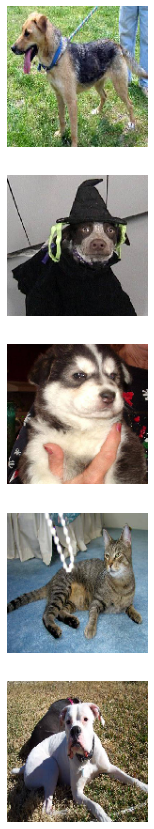

In [ ]:
sample_training_images, _ = next(train_data_gen)
data_visualize(sample_training_images[:5])

In [ ]:
## tranformations image avoid overfit
train_image_generator = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        featurewise_center=True,
        rotation_range= 20)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


Create model

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 2 class -> binary_crossentropy
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience= 3), # reduce learning rate
    tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience= 5),
]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                5308480   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

Train model

In [ ]:
history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs= EPOCHS,
  callbacks= callbacks
)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
32/32 [==============================] - 49s 606ms/step - loss: 1.5026 - accuracy: 0.5077 - val_loss: 0.6897 - val_accuracy: 0.5110
Epoch 2/40
32/32 [==============================] - 19s 590ms/step - loss: 0.6889 - accuracy: 0.5359 - val_loss: 0.6800 - val_accuracy: 0.5730
Epoch 3/40
32/32 [==============================] - 19s 612ms/step - loss: 0.6688 - accuracy: 0.5966 - val_loss: 0.6987 - val_accuracy: 0.5520
Epoch 4/40
32/32 [==============================] - 19s 600ms/step - loss: 0.6565 - accuracy: 0.6086 - val_loss: 0.6233 - val_accuracy: 0.6580
Epoch 5/40
32/32 [==============================] - 19s 602ms/step - loss: 0.6198 - accuracy: 0.6684 - val_loss: 0.5968 - val_accuracy: 0.6870
Epoch 6/40
32/32 [==============================] - 19s 601ms/step - loss: 0.5920 - accuracy: 0.6846 - val_loss: 0.5837 - val_accuracy: 0.6840
Epoch 7/40
32/32 [==============================] - 19s 598ms/step - loss: 0.5857 - accuracy: 0.7124 - val_loss: 0.5642 - val_accuracy: 0.7170

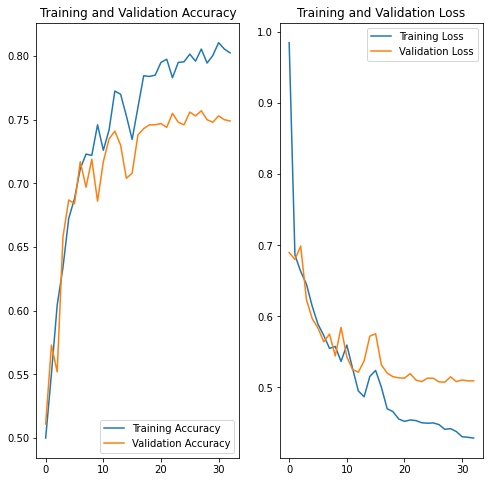

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(33)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

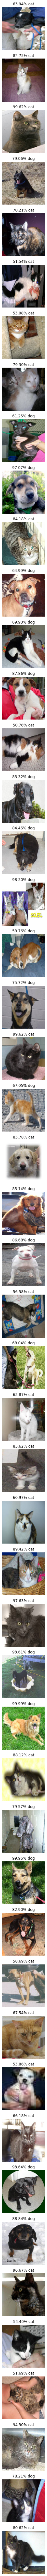

In [ ]:
probabilities = model.predict(test_data_gen)
plotImages([test_data_gen[0][i] for i in range(50)], probabilities=probabilities)